# Murder Mystery Game with LLM Agents

## Overview
This tutorial demonstrates how to create a game environment featuring autonomous LLM agents that take part in the game, using LangGraph, a framework for creating workflows with language models. The project produces a game that can be played by either a human or an LLM Agent.

## Motivation
Creating autonomous agents that interact with a game environment has always been a topic of great interest, and now, we can utilize LLMs as the agents. This kind of work is also interesting from a robotics perspective.

## Murder Mystery Game Description
"Murder Mystery" is an interactive text-based detective game powered by Large Language Models (LLMs).

In this engaging experience, a human player steps into the shoes of Sherlock Holmes to solve procedurally generated murder mysteries. The game creates unique scenarios each time you play.

## Our Inspiration
"Murder Mystery" is an interactive detective game inspired by the recent paper "UNBOUNDED: A Generative Infinite Game of Character Life Simulation" (Li et al., 2024). While UNBOUNDED introduced the concept of generative infinite games through character life simulation, we adapt their core principles to create an engaging murder mystery experience.

Like UNBOUNDED, our game leverages large language models and generative AI to create dynamic, open-ended gameplay that transcends traditional hard-coded game mechanics. Whereas UNBOUNDED allows players to interact with autonomous virtual characters across various environments, our game applies similar technical principles to enable players to step into Sherlock Holmes' shoes and solve procedurally generated murder mysteries.

We wanted to make a tutorial for including LLM Agents inside game environments. Prior to creating this tutorial, we couldn't find a good resource that explains how to achieve this, so we made this tutorial! Additionally, we couldn't find projects that use LLM Agents inside games implemented with LangGraph.

## Architecture
We use two LangGraphs to build the infinite game mechanics for Murder Mystery Agent.

1. Game Loop Graph: This is the main Graph which orchestrates the game creation and game loop. This Graph is responsible for:
   * Creating the game characters/NPCs
   * Creating the storyline
   * Introducing the Players/Users to the game
   * Game Mechanics of Character Interviews (through Conversation Sub Graph) and Guessing the Killer

2. Conversation Sub-graph: This is the Sub Graph which orchestrates the Infinite Conversation Mechanics of the game. This graph allows the Players/Users to interview the different Characters in the game to identify the Killer. The Graph also supports a Sherlock AI assistant that can automate the interview process and assist the Players/Users with their investigation. The Sherlock AI assistant has access to Clues which can aid the Players with their investigation.

The two Graphs together form the complete game mechanics of Murder Mystery Agent.

We have also used display functions which contain basic game logic (which can also be standalone functions). These display functions are responsible for creating a basic UI for the game and allow Players/Users to experience the game in this notebook.

## Key Components
1. State Management: Utilizes `GenerateGameState`, `ConversationState` classes to manage the game state and the textual conversation state
2. Language Model: Employs ChatOpenAI (GPT-4o) for the backstory generation, interactable characters, and (optionally) the LLM investigator protagonist agent
3. Gameplay Features:
   * LLM generated character backstory and story
   * Talk with LLM Agent characters (Human/Sherlock LLM Agent)
   * Pick the killer
4. Interactive UI
5. LangGraph Workflow: Orchestrates the composition process using 2 state graphs:
   * Conversation sub-graph
   * Game Loop graph

## Method
The system has 2 main phases:

Game Setup:
1. User inputs an initial environment string (e.g., "Urban city"), amount of players, and the number of guesses the investigator can make
2. Plot and character backstory generated by an LLM
3. One character is set as the murderer and the others are innocent

Game Loop:
Human/LLM Agent acts as the investigator. It can make 2 actions: talk to characters in the scene and guess which of the characters is the killer.

Talking to characters maintains a conversation with an LLM Agent with memory.

The entire process is orchestrated using LangGraph, which manages the flow of information between different components and ensures that each step builds upon the previous ones.

## A Beginner Friendly Understanding of our Approach

Below is a step by step guide to our thought process as we built Murder Mystery Agent, it is similar to directing a 'Play':

### 1. Setting the Stage
* First, you decide on your story's world - it could be anywhere from a bustling office to a mystical forest
* Choose how many characters will populate your story
* Determine how challenging you want the mystery to be by setting the number of guesses

### 2. Creating the Cast
* Rather than writing every character's background yourself, we let AI create rich, interconnected characters
* Each character has their own personality, motives, and relationship to the story
* One character becomes the victim, another the killer, while others become suspects

### 3. Writing the Story
* The AI weaves together a unique murder mystery incorporating your setting and characters
* Every story element is connected, making the mystery solvable through careful investigation
* Each playthrough creates a completely new narrative

### 4. Designing Interactions
* Players need ways to investigate - like interviewing suspects or examining evidence
* The game tracks these interactions, remembering what each character has said
* Players can either ask their own questions or get help from SherlockAI

### 5. Making it Dynamic
* The conversation system allows for natural back-and-forth dialogue
* Characters remember previous interactions and maintain consistent stories
* This creates an immersive experience where every question could lead to a vital clue

### 6. Player Experience
* A clean, intuitive interface helps players focus on solving the mystery
* Clear feedback shows players how their investigation is progressing
* The game guides players while still leaving room for deduction and reasoning

The beauty of this system is that it combines human creativity (in designing the framework) with AI capabilities (in creating unique content) to produce an endless variety of mysteries. Each game is different, but all follow the same core principles of good detective fiction - observation, deduction, and the thrill of discovery.

This modular approach means you can easily modify any aspect without breaking the others. Want more suspects? Just adjust the character count. Prefer a different setting? Simply change the environment. The system adapts while maintaining the core mystery-solving experience.

## Conclusion
This notebook demonstrates the great potential LLM agents can have in a game, either by utilizing their rich text generation abilities or making them play an active role in a dynamic system. This can be used to make compelling NPC AI, for example.

<div style="text-align: center;">

<img src="../images/murder_mystery_game.png" style="width:50%; height:auto;">
</div>


## Beginner's Guide to Using This Notebook

### Prerequisites
Before you begin, you'll need:
1. A Google Colab account or Jupyter Notebook environment
2. Basic understanding of Python
3. An OpenAI API key (for GPT-4o access)

### Structure of the Notebook
This notebook is organized into several key sections:

1. **Setup & Installation**
   - Installing required libraries
   - Importing necessary packages
   - Setting up API keys

2. **Display Functions**
   - These create the user interface
   - Handle game interactions and visual elements

3. **Core Game Components**
   - State management classes
   - Game logic functions
   - Character and story generation

4. **Game Workflow**
   - Conversation graphs
   - Game loop implementation

### How to Use This Notebook

#### Step 1: Setting Up
1. Open the notebook in Google Colab or your Jupyter environment
2. Run the installation cell to install required packages:
   ```python
   !pip install -q -U langchain-cli langchain langchain_core langgraph langchain_community
   !pip install -q openai langchain_openai
   ```

#### Step 2: API Key Configuration
1. You'll need to set up your OpenAI API key
2. The notebook will prompt you to enter it when needed
3. Alternative methods:
   ```python
   os.environ["OPENAI_API_KEY"] = "your-api-key-here"
   ```

#### Step 3: Running the Game
1. Execute cells in order from top to bottom
2. When you reach the game play section, input:
   - Number of characters (e.g., 5)
   - Number of guesses (e.g., 3)
   - Environment (e.g., "Mistral office in Paris")

#### Step 4: Playing the Game
1. Read the narrative provided by Dr. Watson
2. Choose characters to interview
3. Select between:
   - Using SherlockAI to ask questions
   - Asking your own questions
4. Make your deductions and try to identify the killer

### Common Issues and Solutions

#### API Key Issues
If you see API key errors:
- Ensure you have a valid OpenAI API key
- Check if the key is correctly set in the environment
- Verify your API key has access to GPT-4o

#### Runtime Errors
If you encounter runtime errors:
- Make sure all cells are executed in order
- Verify all required packages are installed
- Check your Python environment matches requirements

#### Game Flow Issues
If the game doesn't progress properly:
- Ensure all cells executed successfully
- Check for any error messages in previous cells
- Verify input formats match expected values

### Customizing the Game
You can modify these parameters to change the game experience:
- `max_characters`: Number of characters in the story
- `num_guesses_left`: Number of attempts to identify the killer
- `environment`: Setting for the murder mystery

Example:
```python
max_characters = 5
num_guesses_left = 3
environment = "Mistral office in Paris"
```

### Tips for Success
1. Read all character descriptions carefully
2. Use SherlockAI for structured questioning
3. Take notes on character responses
4. Look for inconsistencies in statements
5. Consider motives and opportunities

### Additional Resources
- LangChain documentation for understanding the framework
- OpenAI API documentation for GPT-4o integration
- Python basics tutorials if needed

Remember, the goal is to solve the mystery by gathering information through interviews and making logical deductions. Good luck, detective!

## Install Required Libraries

In [ ]:
!pip install -q -U langchain-cli langchain langchain_core langgraph langchain_community
!pip install -q openai langchain_openai

## Import Libraries

In [ ]:
# Python imports
import os
import random
from typing import List, Optional, Annotated, Sequence
from typing_extensions import TypedDict
import operator

from pydantic import BaseModel, Field

import openai
import getpass
from google.colab import userdata

# LangChain imports
from langchain_openai import ChatOpenAI
from langchain_core.messages import (
    AIMessage,
    BaseMessage,
    ChatMessage,
    FunctionMessage,
    HumanMessage,
    SystemMessage,
)
from langgraph.graph import START, END, StateGraph
from langgraph.checkpoint.memory import MemorySaver
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder

# Display imports
from IPython.display import display, Markdown, HTML, Image
from rich import print as rprint
from rich.panel import Panel
from rich.console import Console
from rich.layout import Layout
from rich.style import Style
from rich.prompt import Prompt
from rich.box import HEAVY_EDGE
from rich.table import Table
from rich.text import Text

# Load environment variables and set OpenAI API key
try:
  os.environ["OPENAI_API_KEY"] = userdata.get('OPENAI_API_KEY')
except:
  os.environ["OPENAI_API_KEY"] = getpass.getpass(f"OPENAI_API_KEY: ") # Fallback if env variable is missing, ask user to input key.

## Display Functions (Not Necessary for Core Functionallity)

Define the display functions and logic to provide a interactive UI.

In [ ]:
def print_game_header():
    """
    Displays the main header for the Murder Mystery Investigation game using HTML formatting.
    """
    display(HTML("""
        <h2 style='color: #2d5986;
                   background-color: #f0f5fb;
                   padding: 10px;
                   border-radius: 5px;
                   text-align: center;'>
            🕵️‍♂️ MURDER MYSTERY INVESTIGATION 🔍
        </h2>
    """))

def print_narration(narration):
    """
    Prints the narration dialogue from Dr. John Watson with styled formatting.

    Args:
        narration: The LLM response object containing the narration content in its 'content' attribute.
    """
    console = Console()
    console.print(Panel(
        f"[bold] Dr. John Watson [/bold]:\n\n{narration.content}",
        border_style="blue",
        padding=(1, 2),
        title="💬 Dialogue",
        title_align="left"
    ))
    console.rule(style="blue")

def print_introduction(character, narration):
    """
    Displays the introduction dialogue for a character with styled formatting.

    Args:
        character: Character object containing character information.
        narration: LLM response object containing the narration content in its 'content' attribute.
    """
    console = Console()
    console.rule(f"[bold blue]Conversation with {character.name}[/bold blue]", style="blue")
    console.print(Panel(
        f"[bold]{character.name}[/bold]:\n\n{narration.content}",
        border_style="blue",
        padding=(1, 2),
        title="💬 Dialogue",
        title_align="left"
    ))
    console.rule(style="blue")

def get_player_input(character_name):
    """
    Prompts the player for input during character interactions.

    Args:
        character_name (str): Name of the character being questioned.

    Returns:
        str: The player's input question or 'EXIT' to end the conversation.
    """
    console = Console()

    # Show input instructions
    console.print(Panel(
        f"[bold blue]Ask your question to {character_name}[/bold blue]\n"
        f"[dim]Type 'EXIT' to end conversation[/dim]",
        box=HEAVY_EDGE,
        border_style="blue",
        padding=(1, 2),
        title="💭 Your Question",
        title_align="left"
    ))

    # Custom prompt with styling
    question = Prompt.ask(
        "[bold yellow]Detective[/bold yellow]",
        default="",
        show_default=False
    )

    # Echo the input in a panel for better visibility
    if question.lower() != 'exit':
        console.print(Panel(
            f"[italic]{question}[/italic]",
            border_style="yellow",
            padding=(1, 1),
            title="🔍 Asked",
            title_align="left"
        ))

    return question

def print_character_answer(character, reaction):
    """
    Displays a character's answer with styled formatting.

    Args:
        character: Character object containing character information.
        reaction (str): The character's response or reaction as generated from the LLM.
    """
    console = Console()
    console.print(Panel(
        f"[bold]{character.name}'s Answer[/bold]:\n\n[italic]{reaction}[/italic]",
        border_style="cyan",
        padding=(1, 2),
        title="🗣️ Answer",
        title_align="left"
    ))

def print_characters_list(characters):
    """
    Displays a formatted table of all characters in the game with their backgrounds.

    Args:
        characters (list): List of character objects containing name, role, and backstory.

    Returns:
        dict: Mapping of displayed positions to original character indices.
    """
    console = Console()

    # Create title
    console.print("\n[bold blue]CHARACTERS[/bold blue]", justify="center")

    # Create list of indices and characters
    char_list = list(enumerate(characters))
    random.shuffle(char_list)

    # Create and populate table
    table = Table(
        show_header=True,
        header_style="bold magenta",
        box=HEAVY_EDGE,
        expand=True
    )

    table.add_column("#", style="dim", width=4)
    table.add_column("Name", style="bold cyan", width=20)
    table.add_column("Background", style="green")

    # Create mapping of displayed position to original index
    display_to_original = {}

    for display_pos, (orig_idx, character) in enumerate(char_list):
        # Add victim note to name if applicable
        name_text = f"{character.name} {'[red](victim)[/red]' if character.role == 'Victim' else ''}"

        table.add_row(
            str(display_pos + 1),
            name_text,
            Text(character.backstory, overflow="fold")
        )
        display_to_original[display_pos] = orig_idx
        # Add border between rows
        if display_pos < len(char_list) - 1:
            table.add_row(style="dim")

    console.print(table)
    return display_to_original

def get_character_selection(characters, display_to_original):
    """
    Handles the player's character selection for investigation during the game.

    Args:
        characters (list): List of character objects.
        display_to_original (dict): Mapping of displayed positions to original indices.

    Returns:
        dict: Contains selected_character_id (None if player chooses to guess the killer).

    Note:
        Returns -1 when player wants to guess the killer.
        Validates input and prevents selection of the victim.
    """
    console = Console()

    while True:
        try:
            # Create selection prompt
            console.print(Panel(
                "[bold blue]Enter the number of the character to investigate[/bold blue]\n"
                "[dim]Enter -1 to Guess the Killer[/dim]",
                border_style="blue",
                title="👤 Selection",
                title_align="left"
            ))

            # Get user input
            choice = Prompt.ask(
                "[bold yellow]Detective[/bold yellow]",
                default="-1",
                show_default=False
            )

            # Convert to int and validate
            choice = int(choice)

            if choice == -1:
                return {"selected_character_id": None}

            if 0 < choice <= len(characters):
                # Map displayed choice to original index
                original_idx = display_to_original[choice - 1]
                selected_character = characters[original_idx]

                if selected_character.role == 'victim':
                    console.print("[red]Invalid input. You are unable to choose the victim[/red]")
                    continue

                # Show selection confirmation
                console.print(f"You have selected {selected_character.name}")
                return {"selected_character_id": original_idx}

            console.print("[red]Invalid input. Please enter a number within the range or -1.[/red]")

        except ValueError:
            console.print("[red]Invalid input. Please enter a number.[/red]")
        except KeyError:
            console.print("[red]Invalid selection. Please try again.[/red]")

def get_player_yesno_answer(question):
    """
    Prompts the player for a yes/no response regarding Sherlock AI assistance.

    Args:
        question (str): The player instruction/question to display to the player.

    Returns:
        str: Player's response ('y' for yes, 'n' for no/exit)
    """
    console = Console()

    # Show input instructions
    console.print(Panel(
        f"[bold blue]{question}[/bold blue]\n"
        f"enter 'y' to get his help or 'n' to ask by yourself or exit",
        box=HEAVY_EDGE,
        border_style="blue",
        padding=(1, 2),
        title="🤖🕵️ Sherlock AI",
        title_align="left"
    ))

    # Custom prompt with styling
    answer = Prompt.ask(
        "[bold yellow]Detective[/bold yellow]",
        default="",
        show_default=False
    )
    return answer

def print_suspect_list(characters):
    """
    Displays a formatted table of all suspects in the investigation.

    Args:
        characters (list): List of character objects to be displayed as suspects.
    """
    console = Console()

    # Create and populate table
    table = Table(
        show_header=True,
        header_style="bold bright_red",
        box=HEAVY_EDGE,
        expand=True,
        title="[bold bright_red]🔍 Suspects[/bold bright_red]"
    )

    table.add_column("#", style="dim", width=4)
    table.add_column("Name", style="bold bright_red")

    # Sort characters by name
    characters = sorted(characters, key=lambda x: x.name)
    for idx, character in enumerate(characters, 1):
        table.add_row(str(idx), character.name)

    console.print(table)

def print_guesses_remaining(num_guesses):
    """
    Displays the number of remaining guesses available to the player.

    Args:
        num_guesses (int): Number of guesses remaining.
    """
    console = Console()
    console.print(Panel(
        f"[bold]You have {num_guesses} {'guess' if num_guesses == 1 else 'guesses'} remaining[/bold]",
        border_style="yellow",
        title="⏳ Guesses",
        title_align="left"
    ))

def print_result(is_win, is_lose, killer_name=None):
    """
    Displays the game result message indicating whether the player won or lost.

    Args:
        is_win (bool): True if player won the game.
        is_lose (bool): True if player lost the game.
        killer_name (str, optional): Name of the killer to reveal if player lost.
    """
    console = Console()
    if is_win:
        console.print(Panel(
            "[bold green]Congratulations! You have correctly identified the killer.[/bold green]",
            border_style="green",
            title="🎯 Success",
            title_align="left"
        ))
    elif is_lose:
        console.print(Panel(
            f"[bold bright_red]Investigation Failed![/bold bright_red]\n[bright_red]The killer was {killer_name}.[/bright_red]",
            border_style="bright_red",
            title="❌ Game Over",
            title_align="left"
        ))

def print_incorrect_guess():
    """
    Displays a message indicating that the player's guess was incorrect.
    """
    console = Console()
    console.print(Panel(
        "[bold yellow]The person you chose was innocent.[/bold yellow]",
        border_style="yellow",
        title="❗ Wrong Guess",
        title_align="left"
    ))

## State and Schema Classes Definition

We define 3 schema classes:
1. `Character`: an ingame character
2. `NPC`: The interactable character list for the game
3. `StoryDetails`: Blueprint for story details to LLM generate  
The schema classes allow us to request structured output from the LLM  

We define 2 state classes:
1. `ConversationState`: holds the ongoing conversation state throughout the game
2. `GenerateGameState`: holds the overall game state


In [ ]:
# Classes to define the Game Characters and allow for Structured Output from the LLMs while generating the Characters
class Character(BaseModel):
    role: str = Field(
        description="Primary role of the character in the story",
    )
    name: str = Field(
        description="Name of the character."
    )
    backstory: str = Field(
        description="Backstory of the character focus, concerns, and motives.",
    )
    @property
    def persona(self) -> str:
        return f"Name: {self.name}\nRole: {self.role}\nBackstory: {self.backstory}\n"

class NPC(BaseModel):
    characters: List[Character] = Field(
        description="Comprehensive list of characters with their roles and backstories.",
        default_factory=list
    )

# A Class to define the Game Story and allow for Structured Output from the LLMs while generating the Game Story
class StoryDetails(BaseModel):
    victim_name: str = Field(
        description="Name of the murder victim"
    )
    time_of_death: str = Field(
        description="Approximate time when the murder occurred"
    )
    location_found: str = Field(
        description="Where the body was discovered"
    )
    murder_weapon: str = Field(
        description="The weapon or method used in the murder"
    )
    cause_of_death: str = Field(
        description="Specific medical cause of death"
    )
    crime_scene_details: str = Field(
        description="Description of the crime scene and any relevant evidence found"
    )
    witnesses: str = Field(
        description="Information about potential witnesses or last known sightings"
    )
    initial_clues: str = Field(
        description="Initial clues or evidence found at the scene"
    )
    npc_brief:str = Field(
        description="Brief description of the characters and their relationships"
    )

# A Class to define and manage the State for the conversation
class ConversationState(TypedDict):
    messages: Annotated[Sequence[BaseMessage], operator.add]
    character: Character # Character being interviewed
    story_details: Optional[StoryDetails]  # Details about the murder mystery

# A Class to define and manage the overall State of the Game
class GenerateGameState(TypedDict):
    messages: Annotated[Sequence[BaseMessage], operator.add]
    environment: str  # Story environment
    max_characters: int  # Number of characters
    characters: List[Character]  # Characters in the story
    story_details: Optional[StoryDetails]  # Details about the murder mystery
    selected_character_id: Optional[int] # Index of the selected character
    num_guesses_left: int # Number of guesses the player has
    result: str #Store the Guesser result and evalute Correct/Incorrect

## LLM Initialization

Initialize the Large Language Model (LLM) backbone for all the different agents in our system.  
We have used OPEN AI GPT-4o for our development and testing.  
The code should also work with any other LLM supported by LangChain.  
  
We set the `temperature` to 0, this makes the run deterministic, i.e. no randomness.

In [ ]:
llm = ChatOpenAI(model="gpt-4o", temperature=0)

## Component Functions

Define the component functions:
- premise story generation
- character background story generation
- character dialogue
- sherlock LLM agent questioning
- killer guessing

In [ ]:
# Node: Characters introduce themselves to the User (as Sherlock)

def character_introduction(state: ConversationState):
    """
    Part of the Conversation Sub-Graph.

    Generates and displays a character's introduction to Sherlock Holmes in the murder mystery game.

    Args:
        state (ConversationState): The LangGraph State object containing:
            - messages: List of previous conversation messages. Used to store conversation history
            - character: Character object with persona and character details
            - story_details: Object containing crime details including:
                - victim_name, time_of_death, location_found
                - murder_weapon, cause_of_death
                - crime_scene_details, initial_clues

    Returns:
        dict: Adds the introduction messages to the conversation history
            - messages: Introduction messages to be added

    Note:
        The function uses an LLM to generate appropriate character dialogue while ensuring
        the character doesn't reveal their role or incriminate themselves.
    """

    character = state['character']
    story = state['story_details']
    character_instructions = """You are playing the role of a character with the below persona:
{subject_persona}
You are being interviewed by Sherlock Holmes in relationship to the below crime:
Crime details:
- Victim: {victim}
- Time of death: {time}
- Location: {location}
Please greet and introduce your self to Sherlock Holmes.
Your tone should be conversational and should address Sherlock Holmes directly.
Make sure that you do not reveal your role and incriminate yourself.
"""
    system_message = character_instructions.format(
        subject_persona=character.persona,
        victim=story.victim_name,
        time=story.time_of_death,
        location=story.location_found,
    )
    # Generate narration
    narration = llm.invoke([
        SystemMessage(content=system_message),
        HumanMessage(content="Introduce yourself to Sherlock Holmes")
    ])

    print_introduction(character, narration)

    return {"messages": [narration]}


sherlock_ask_prompt = """
You are Sherlock Holmes, the renowned detective. You are interviewing {character_name} about the murder of {victim_name}.
The murder occurred around {time_of_death} at {location_found}. The murder weapon was {murder_weapon}, and the cause of death was {cause_of_death}.

Here's the crime scene description: {crime_scene_details}
Here are some initial clues: {initial_clues}

Here's the conversation history with {character_name}:
{conversation_history}

Considering the above information, formulate a insightful and relevant question to ask {character_name} to further investigate the case.
The question should be phrased in a manner befitting Sherlock Holmes's inquisitive nature.
in your answer make a new line for every sentance to make it easier to read.
"""
def get_question(state: ConversationState):
    """
    Part of the Conversation Sub-Graph.

    Generates an investigative question from Sherlock Holmes to ask a character.

    Args:
        state (ConversationState): The LangGraph State object containing:
            - messages: List of previous conversation messages. Used to store conversation history
            - character: Character object with persona and character details specific to the character being interviewed
            - story_details: Object containing crime details including:
                - victim_name, time_of_death, location_found
                - murder_weapon, cause_of_death
                - crime_scene_details, initial_clues

    Returns:
        str: Generated question content from Sherlock AI assistance.

    Note:
        The question is generated considering:
        - The crime scene details and initial clues
        - Previous conversation history with the character
        - Sherlock Holmes' characteristic investigative style
    """

    messages = state["messages"]
    character = state["character"]
    story = state["story_details"]
    system_message = sherlock_ask_prompt.format(
        character_name=character.name,
        victim_name=story.victim_name,
        time_of_death=story.time_of_death,
        location_found=story.location_found,
        murder_weapon=story.murder_weapon,
        cause_of_death=story.cause_of_death,
        crime_scene_details=story.crime_scene_details,
        initial_clues=story.initial_clues,
        conversation_history="\n".join([f"{msg.type}: {msg.content}" for msg in messages])
    )

    prompt = ChatPromptTemplate.from_messages(
          [
              (
                  "system",
                  system_message,
              ),
              MessagesPlaceholder(variable_name="messages"),
          ]
      )
    chain = prompt | llm
    question = chain.invoke(messages)

    console = Console()
    console.print(Panel(
        f"[italic]{question.content}[/italic]",
        border_style="yellow",
        padding=(1, 1),
        title="🔍 Asked by Sherlock AI 🤖🕵️",
        title_align="left"
    ))

    return question.content

# Node: User can ask a question to the Character or decide to quit the conversation

def ask_question(state: ConversationState):
    """
    Part of the Conversation Sub-Graph.

    Handles the question-asking process, allowing either AI-generated Sherlock questions
    or direct player input.

    Args:
        state (ConversationState): The LangGraph State object containing:
            - messages: List of previous conversation messages. Used to store conversation history
            - character: Character object with persona and character details
            - story_details: Object containing crime details including:
                - victim_name, time_of_death, location_found
                - murder_weapon, cause_of_death
                - crime_scene_details, initial_clues

    Returns:
        dict: Adds question asked to the conversation history
            - messages : Question to be added

    Note:
        - Provides option to use AI-generated "SherlockAI" questions
        - Handles input validation and error cases
        - Allows for conversation termination
    """
    character = state['character']
    # Get user input
    while True:
      try:
        use_ai_sherlock = get_player_yesno_answer("Do you want SherlockAI to ask a question?")
        if use_ai_sherlock.lower()[0] == 'y':
          question = get_question(state)
        else:
          question = get_player_input(character.name)
        return {"messages": [HumanMessage(content=question)]}
      except ValueError:
            print("Invalid input. Please enter a valid question")


# Node: Character answers the question posed by the User

def answer_question(state: ConversationState):
    """
    Part of the Conversation Sub-Graph.

    Generates a character's response to a question during the investigation.

    Args:
        state (ConversationState): The LangGraph State object containing:
            - messages: List of previous conversation messages. Used to store conversation history
            - character: Character object with persona and character details specifc to the character answering the question
            - story_details: Object containing crime details including:
                - victim_name, time_of_death, location_found
                - murder_weapon, cause_of_death
                - crime_scene_details, initial_clues

    Returns:
        dict: Adds response from the character to the conversation history
            - messages : Response to be added

    Note:
        The character's response:
        - Maintains consistency with their persona and knowledge
        - Considers their relationships with other characters
        - May include deception based on character motivations
        - Takes into account all previous conversation context
    """
    messages = state['messages']
    character = state['character']
    last_message = messages[-1]
    story = state['story_details']
    answer_instructions = """
You are playing the role of a character with the below persona:
{subject_persona}
You are being interviewed by Sherlock Holmes in relationship to the below crime:
Crime Scene Details:
    Victim: {victim}
    Time: {time}
    Location: {location}
    Weapon: {weapon}
    Cause of Death: {cause}

    Scene Description:
    {scene}

    All Characters and their relationships:
    {npc_brief}
Based on the message history, answer the question as the character would, based on:
1. Your character's personality and background
2. Your knowledge of the crime
3. Your relationships with other characters
4. Your potential motives or alibis


Important:
- Stay in character
- Only reveal information this character would know
- Maintain consistency with the story details
- You can lie if your character would have a reason to do so

Question to answer:
{question}
"""
    system_message = answer_instructions.format(
        subject_persona=character.persona,
        victim=story.victim_name,
        time=story.time_of_death,
        location=story.location_found,
        weapon=story.murder_weapon,
        cause=story.cause_of_death,
        scene=story.crime_scene_details,
        npc_brief=story.npc_brief,
        question=last_message.content
    )

    prompt = ChatPromptTemplate.from_messages(
          [
              (
                  "system",
                  system_message,
              ),
              MessagesPlaceholder(variable_name="messages"),
          ]
      )
    chain = prompt | llm
    answer = chain.invoke(messages)

    print_character_answer(character, answer.content)

    return {"messages":[answer]}

# Conditional Edge Function

def where_to_go(state: ConversationState):
    """
    Part of the Conversation Sub-Graph.

    Determines the next conversation state based on the last message.

    Args:
        state (ConversationState): The LangGraph State object containing:
            - messages: List of previous conversation messages. Used to store conversation history
            - character: Character object with persona and character details
            - story_details: Object containing crime details including:
                - victim_name, time_of_death, location_found
                - murder_weapon, cause_of_death
                - crime_scene_details, initial_clues

    Returns:
        str: Either "end" to terminate conversation or "continue" to proceed

    Note:
        Checks for "EXIT" keyword in the last message to determine conversation flow.
    """
    messages = state['messages']
    last_message = messages[-1]
    if "EXIT" in last_message.content:
        return "end"
    else:
        return "continue"


# Node: Character Creation

character_instructions="""You are an AI character designer tasked with creating personas for a murder mystery game.
Your goal is to develop a cast of characters that fits the given environment and creates an engaging, interactive experience for players.

First, carefully understand the environment setting:

<environment>
{{environment}}
</environment>

Now, follow these steps to create the character personas:

1. Review the environment and identify the most interesting themes and elements that could influence character creation.

2. Determine the number of characters to create. This will be specified by the max_characters variable:

<max_characters>
{{max_characters}}
</max_characters>

3. Based on the environment and the number of characters, create a list of roles that would be appropriate for the setting. Remember:
   - One character must be designated as the killer.
   - One character must be designated as the victim.
   - The remaining characters should be supporting roles who can be questioned by the detective.
   - Roles should fit the story setting (e.g., shopkeepers in a market, passengers on a train).

4. Assign one character to each role, ensuring a diverse and interesting cast.

5. For each character, provide:
   - A name
   - Their role in the story
   - A brief description of their persona, including any relevant background or motivations

Before creating the final list, brainstorm and plan your approach inside <character_development> tags:

<character_development>
[Your thought process here. Consider the following:
1. List potential character archetypes that fit the environment.
2. Brainstorm possible motives for the killer and how other characters might be connected.
3. Consider character relationships and potential conflicts.
4. Think about the setting, interesting character dynamics, and how each character might contribute to the mystery.]
</character_development>

After your brainstorming, create the final list of characters.

Remember:
- Ensure that the characters and their roles are appropriate for the given environment.
- Make the characters diverse and interesting to enhance the gameplay experience.
- Provide enough detail for each character to make them memorable and useful in the game context."""

def create_characters(state: GenerateGameState):
    """
    Part of the Game Loop Graph.

    Creates a cast of characters for the murder mystery game based on the environment and the max_characters.

    Args:
        state (GenerateGameState): The LangGraph State object containing:
            - environment: Description of the game's setting
            - max_characters: Maximum number of characters to create

    Returns:
        dict : Contains the generated character list. Adds to the State object.
            - characters : List of NPC objects with defined roles, including:
                - One killer
                - One victim
                - Supporting characters

    Note:
        - Uses structured LLM output to ensure consistent character creation
        - Each character has a name, role, and detailed persona
        - Ensures character diversity and setting appropriateness
    """

    environment = state['environment']
    max_characters = state['max_characters']

    # Enforce structured output
    structured_llm = llm.with_structured_output(NPC)

    # System message
    system_message = character_instructions.replace("{{environment}}", environment)
    system_message = system_message.replace("{{max_characters}}", str(max_characters))

    # Generate characters
    result = structured_llm.invoke([
        SystemMessage(content=system_message),
        HumanMessage(content="Generate the set of characters")
    ])

    # Return the characters from the NPC object
    return {"characters": result.characters}


# Node: Story Creation including Crime Seen, Incident Details and Story Arc

story_instructions = """You are crafting the central murder mystery for our story. Using the provided environment and characters, create a compelling murder scenario.
Include specific details about the crime while maintaining mystery about the killer's identity.

Environment:
{{environment}}

Characters:
{{characters}}

Follow these guidelines when creating the murder scenario:

1. For the victim describe:
   - Where and how the body was found
   - The approximate time of death
   - The cause of death and murder weapon
   - The condition of the crime scene

2. Include crucial evidence and clues:
   - Physical evidence at the scene
   - Witness statements or last known sightings
   - Any suspicious circumstances
   - Environmental factors that might be relevant

3. Create a mix of:
   - True clues that lead to the killer
   - Red herrings that create suspense
   - Background circumstances that add depth

4. Consider:
   - The timing of the murder
   - Access to the location
   - Potential motives
   - Physical evidence
   - Witness reliability

5. For the Character Brief:
   - Mention the important points
   - DO not mention who the killer is

Important:
- DO NOT reveal or hint at the killer's identity
- Include enough detail to make the mystery solvable
- Ensure all clues are consistent with the environment and characters
- Make the scenario complex enough to be interesting but clear enough to be solvable

Format your response to provide the specific details requested in the StoryDetails schema."""

def create_story(state: GenerateGameState):
    """
    Part of the Game Loop Graph.

    Generates the complete murder mystery scenario and storyline based on the provided environment and the generated characters.

    Args:
        state (GenerateGameState): The LangGraph State object containing:
            - environment: Description of the game's setting
            - characters: List of character objects generated in create_character step

    Returns:
        dict: Contains the complete story details. Adds to the State Object.
            - story_details: StoryDetails object including:
                - Crime scene information
                - Evidence and clues
                - Character relationships
                - Environmental factors

    Note:
        - Creates a solvable mystery without revealing the killer
        - Includes both true clues and red herrings
        - Ensures consistency between characters and environment
    """

    environment = state['environment']
    characters = state['characters']

    # Format character list for the prompt
    character_list = "\n".join([char.persona for char in characters])

    # Enforce structured output
    structured_llm = llm.with_structured_output(StoryDetails)

    # System message
    system_message = story_instructions.replace("{{environment}}", environment)
    system_message = system_message.replace("{{characters}}", character_list)

    # Generate story details
    result = structured_llm.invoke([
        SystemMessage(content=system_message),
        HumanMessage(content="Generate the murder mystery scenario")
    ])

    # Return the story details
    return {"story_details": result}


# Node: The Narator (Dr. John Watson) who narators the crime seen and other deatils

narrator_instructions = """You are trusted assistant and friend of the legendary detective Sherlock Holmes - Dr. John Watson.
Sherlock has just arrived at the seen of the murder.
Use the provided details to give Sherlock a brief, engaging introduction to the crime seen in 100 words or less.
Your tone should be conversational and should address Sherlock Holmes directly.

Crime Scene Details:
    Victim: {victim}
    Time: {time}
    Location: {location}
    Weapon: {weapon}
    Cause of Death: {cause}

    Scene Description:
    {scene}
"""

def narrartor(state: GenerateGameState):
    """
    Part of the Game Loop Graph.

    Generates Dr. Watson's narration of the crime scene for Sherlock Holmes.

    Args:
        state (GenerateGameState): The LangGraph State object containing:
            - story_details: Complete information about the crime

    Returns:
        dict: Contains the narration message. Adds to the State Object.
            - messages: Dr. Watson's narrative description

    Note:
        - Provides a concise (100 words or less) introduction to the crime
        - Maintains Dr. Watson's characteristic narrative style
        - Sets the initial atmosphere for the investigation
    """
    story = state['story_details']

    # Format the message with the story details
    system_message = narrator_instructions.format(
        victim=story.victim_name,
        time=story.time_of_death,
        location=story.location_found,
        weapon=story.murder_weapon,
        cause=story.cause_of_death,
        scene=story.crime_scene_details
    )
    # Generate narration
    narration = llm.invoke([
        SystemMessage(content=system_message),
        HumanMessage(content="Create an atmospheric narration of the crime scene")
    ])

    print_game_header()
    print_narration(narration)

    return {"messages": [narration]}

# Node: User to select who to investigate

def sherlock(state: GenerateGameState):
    """
    Part of the Game Loop Graph.

    Handles the character selection phase of the investigation.

    Args:
        state (GenerateGameState): The LangGraph State object containing:
            - characters: List of all character objects

    Returns:
        dict: Result of get_character_selection containing. Adds to the State Object.
            - selected_character_id: Index of selected character or None for guessing phase

    Note:
        - Displays character list with randomized order
        - Maintains mapping between display order and original character indices
        - Prevents selection of the victim character
    """
    characters = state['characters']

    # Display characters and get the mapping of displayed order to original indices
    display_to_original = print_characters_list(characters)

    # Get user selection
    return get_character_selection(characters, display_to_original)


#Node: Allows the Users to guess the Killer

KILLER_ROLE = "Killer"

def guesser(state: GenerateGameState):
    """
    Part of the Game Loop Graph.

    Manages the final phase where the player attempts to identify the killer.

    Args:
        state (GenerateGameState): The LangGraph State object containing:
            - num_guesses_left: Number of remaining guess attempts
            - characters: List of all character objects

    Returns:
        dict: Contains:
            - result: "end" if game is over, "sherlock" to continue investigation
            - num_guesses_left: Updated number of remaining guesses

    Note:
        - Handles the win/loss conditions
        - Maintains guess counter
        - Provides feedback on incorrect guesses
        - Excludes victim from suspect list
    """
    console = Console()
    num_guesses_left = state['num_guesses_left']
    all_characters = state['characters']
    non_victims = [char for char in all_characters if char.role != 'Victim']
    killer_character = next(char for char in all_characters if char.role == KILLER_ROLE)
    characters = list(sorted(non_victims, key=lambda x: x.name))

    # Print initial state
    console.rule("[bold red]🔍 Final Deduction[/bold red]")
    print_guesses_remaining(num_guesses_left)
    print_suspect_list(characters)

    is_win, is_lose = False, False

    while True:
        try:
            # Get user input
            choice = Prompt.ask(
                "\n[bold red]Who is the killer?[/bold red] (Enter suspect number)",
                default="",
                show_default=False
            )

            choice = int(choice)
            if 0 < choice <= len(characters):
                selected_character_id = choice - 1
                selected_character = characters[selected_character_id]

                if selected_character.role == KILLER_ROLE:
                    is_win = True
                    break
                else:
                    print_incorrect_guess()
                    num_guesses_left -= 1
                    if num_guesses_left > 0:
                        print_guesses_remaining(num_guesses_left)

                if num_guesses_left == 0:
                    is_lose = True
                    break

            else:
                console.print("[red]Invalid input. Please enter a valid suspect number.[/red]")
        except ValueError:
            console.print("[red]Invalid input. Please enter a number.[/red]")

    # Print final result
    print_result(is_win, is_lose, killer_character.name)

    is_end = is_win or is_lose
    return {"result": "end", "num_guesses_left": num_guesses_left} if is_end else {"result": "sherlock", "num_guesses_left": num_guesses_left}


# Node: Adding the Conversation SubGraph i.e. Conversation Loop

def conversation(state: GenerateGameState):
    """
    Part of the Game Loop Graph.

    Manages the main conversation loop between Sherlock/player and characters.

    Args:
        state (GenerateGameState): The LangGraph State object containing:
            - selected_character_id: ID of the character to converse with
            - characters: List of all character objects
            - story_details: Complete story information

    Returns:
        dict: Contains either:
            - messages: List of conversation messages if character selected
            - END constant if no character selected (moving to guessing phase)

    Note:
        - Implements recursion limit to prevent infinite loops
        - Handles conversation flow and state management
        - Integrates with the conversation subgraph
    """
    selected_character_id = state['selected_character_id']
    if selected_character_id is not None:
        characters = state['characters']
        character = characters[selected_character_id]
        inputs = {
            "character": character,
            "story_details": state['story_details'],
        }
        response = conversation_graph.invoke(inputs,{"recursion_limit": 50})

        # Return the response as a message
        return {"messages": [response['messages']]}
    else:
        return END

## Conversation Sub-Graph Construction

Construct the LangGraph workflow for the conversation mechanic.

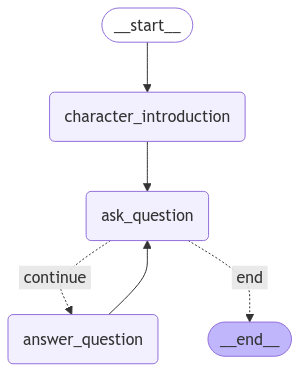

In [ ]:
# Creating the Conversation Graph to act as the Conversation Loop

# Update the graph
conversation_builder = StateGraph(ConversationState)

# Add nodes
conversation_builder.add_node("character_introduction", character_introduction)
conversation_builder.add_node("ask_question", ask_question)
conversation_builder.add_node("answer_question", answer_question)

# Add edges
conversation_builder.add_edge(START, "character_introduction")
conversation_builder.add_edge("character_introduction", "ask_question")
conversation_builder.add_conditional_edges("ask_question",where_to_go,{"continue": "answer_question", "end": END})
conversation_builder.add_edge("answer_question", "ask_question")

conversation_graph = conversation_builder.compile()
# View
display(Image(conversation_graph.get_graph(xray=1).draw_mermaid_png()))

## Game Loop Graph Construction

Construct the LangGraph workflow for the overall game loop. The graph contains the conversation workflow.

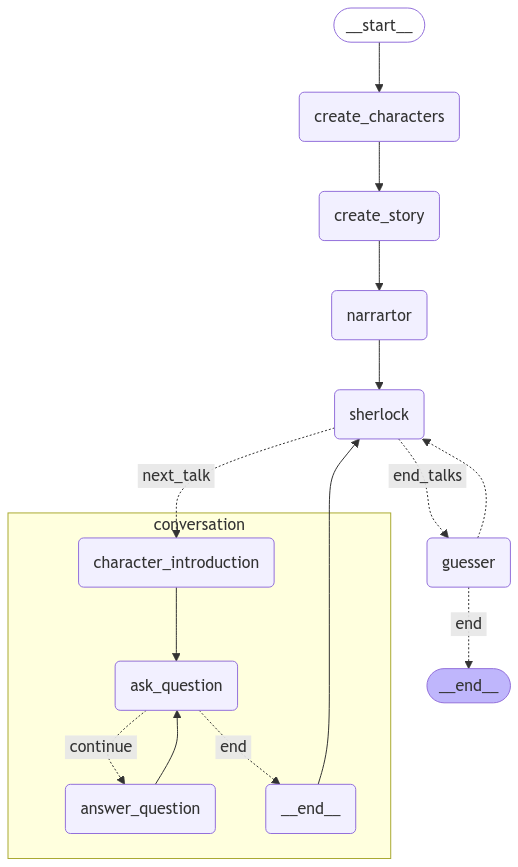

In [ ]:
# Creating the Core Game Graph

# Update the graph
builder = StateGraph(GenerateGameState)

# Add nodes
builder.add_node("create_characters", create_characters)
builder.add_node("create_story", create_story)
builder.add_node("narrartor", narrartor)
builder.add_node("sherlock", sherlock)
builder.add_node("guesser", guesser)
builder.add_node("conversation", conversation)



# Add edges
builder.add_edge(START, "create_characters")
builder.add_edge("create_characters", "create_story")
builder.add_edge("create_story", "narrartor")
builder.add_edge("narrartor", "sherlock")

builder.add_conditional_edges("sherlock",
                              lambda state: "next_talk" if state.get('selected_character_id') is not None else "end_talks",
                              {
                                "next_talk": "conversation",
                                "end_talks": "guesser"
                              }
)

builder.add_edge("conversation", "sherlock")
builder.add_conditional_edges("guesser",
                              lambda state: state.get('result'),
                              {"sherlock":"sherlock","end":END})

# Compile
graph = builder.compile()
# View
display(Image(graph.get_graph(xray=1).draw_mermaid_png()))

# Game Play

In [ ]:
# Input
max_characters = 5
num_guesses_left: int = 3
environment = "Mistral office in Paris"

output = graph.invoke({"environment":environment,"max_characters":max_characters, "num_guesses_left": num_guesses_left})

╭─ 💬 Dialogue ───────────────────────────────────────────────────────────────────────────────────────────────────╮
│                                                                                                                 │
│   Dr. John Watson :                                                                                             │
│                                                                                                                 │
│  Ah, Sherlock, welcome to the scene. Claire Moreau, the victim, met her untimely end between 8:00 and 9:00 PM   │
│  right here in her office at Mistral headquarters. The room is in chaos—papers strewn about, a vase shattered   │
│  near the desk. The letter opener, the murder weapon, lies on the floor, stained with blood. Interestingly,     │
│  the window is slightly open, hinting at a possible escape route. No signs of forced entry, though. Her         │
│  computer remains on, displaying an unfinished email draft. It seems we have a puzzle on our hands, my friend.  │
│  Where shall we begin?                                                                                          │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

───────────────────────────────────────────────────────────────────────────────────────────────────────────────────

CHARACTERS

┏━━━━━━┯━━━━━━━━━━━━━━━━━━━━━━┯━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ #    │ Name                 │ Background                                                                        ┃
┠──────┼──────────────────────┼───────────────────────────────────────────────────────────────────────────────────┨
┃ 1    │ Marc Renault         │ Marc is the head of finance at Mistral and has been with the company for over two ┃
┃      │                      │ decades. He is known for his conservative approach to business and was openly     ┃
┃      │                      │ critical of Claire's new direction for the company. Marc's financial strategies   ┃
┃      │                      │ were often at odds with Claire's vision, creating tension between them.           ┃
┃      │                      │                                                                                   ┃
┃ 2    │ Claire Moreau        │ Claire was the beloved CEO of Mistral, known for her innovative ideas and         ┃
┃      │ (victim)             │ compassionate leadership. She recently made a controversial decision to           ┃
┃      │                      │ restructure the company, which upset several high-ranking employees. Claire's     ┃
┃      │                      │ vision for the company was to prioritize sustainability, which clashed with some  ┃
┃      │                      │ of the more profit-driven executives.                                             ┃
┃      │                      │                                                                                   ┃
┃ 3    │ Inspector Jean       │ Inspector Leclerc is a seasoned detective with a keen eye for detail and a        ┃
┃      │ Leclerc              │ reputation for solving complex cases. He is known for his methodical approach and ┃
┃      │                      │ ability to read people. Leclerc has a personal interest in this case, as he once  ┃
┃      │                      │ worked with Claire on a charity project and admired her greatly.                  ┃
┃      │                      │                                                                                   ┃
┃ 4    │ Lucien Dupont        │ Lucien is a senior executive at Mistral, known for his ambitious nature and       ┃
┃      │                      │ cutthroat tactics. He has been eyeing the CEO position for years and sees the     ┃
┃      │                      │ victim as a major obstacle in his path. Lucien's motive stems from a recent       ┃
┃      │                      │ decision by the victim that jeopardized a major project he was leading,           ┃
┃      │                      │ threatening his career and reputation.                                            ┃
┃      │                      │                                                                                   ┃
┃ 5    │ Sophie Dubois        │ Sophie is the head of the marketing department and was a close confidante of      ┃
┃      │                      │ Claire. She is intelligent and resourceful, but her loyalty to Claire made her    ┃
┃      │                      │ unpopular with some colleagues. Sophie had been working on a campaign that was    ┃
┃      │                      │ shelved due to the restructuring, giving her a potential motive.                  ┃
┗━━━━━━┷━━━━━━━━━━━━━━━━━━━━━━┷━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┛

╭─ 👤 Selection ──────────────────────────────────────────────────────────────────────────────────────────────────╮
│ Enter the number of the character to investigate                                                                │
│ Enter -1 to Guess the Killer                                                                                    │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Detective:

You have selected Marc Renault

───────────────────────────────────────── Conversation with Marc Renault ──────────────────────────────────────────

╭─ 💬 Dialogue ───────────────────────────────────────────────────────────────────────────────────────────────────╮
│                                                                                                                 │
│  Marc Renault:                                                                                                  │
│                                                                                                                 │
│  Good day, Mr. Holmes. My name is Marc Renault. I've been with Mistral for over twenty years, heading the       │
│  finance department. It's a pleasure to meet someone of your reputation, though I wish it were under different  │
│  circumstances. How can I assist you in your investigation?                                                     │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

───────────────────────────────────────────────────────────────────────────────────────────────────────────────────

┏━ 🤖🕵️ Sherlock AI ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃                                                                                                                 ┃
┃  Do you want SherlockAI to ask a question?                                                                      ┃
┃  enter 'y' to get his help or 'n' to ask by yourself or exit                                                    ┃
┃                                                                                                                 ┃
┗━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┛

Detective:

╭─ 🔍 Asked by Sherlock AI 🤖🕵️ ───────────────────────────────────────────────────────────────────────────────────╮
│                                                                                                                 │
│ Mr. Renault, your extensive tenure at Mistral suggests a deep familiarity with both the company and its         │
│ personnel.                                                                                                      │
│                                                                                                                 │
│ Could you elucidate any recent tensions or conflicts within the office, particularly those involving Claire     │
│ Moreau?                                                                                                         │
│                                                                                                                 │
│ Furthermore, given your position, might you have any insight into the restructuring decision that seemed to     │
│ have caused some discontent, as evidenced by Mr. Dupont's voicemail?                                            │
│                                                                                                                 │
│ Lastly, were you aware of any meetings or appointments Claire had scheduled on the evening of her untimely      │
│ demise?                                                                                                         │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭─ 🗣️ Answer ──────────────────────────────────────────────────────────────────────────────────────────────────────╮
│                                                                                                                 │
│  Marc Renault's Answer:                                                                                         │
│                                                                                                                 │
│  Certainly, Mr. Holmes. As you might expect, with any major restructuring, there are bound to be tensions and   │
│  disagreements. Claire's recent decisions were quite controversial, especially among those of us who have been  │
│  with Mistral for a long time. Her vision for the company was bold, but it clashed with my more conservative    │
│  financial strategies. I was openly critical of her approach, as I believed it posed significant risks to the   │
│  company's stability.                                                                                           │
│                                                                                                                 │
│  Regarding Mr. Dupont, he is indeed ambitious and saw Claire's restructuring as an obstacle to his own          │
│  aspirations. His voicemail doesn't surprise me; he was quite vocal about his dissatisfaction. However, I       │
│  can't speak to his intentions beyond that.                                                                     │
│                                                                                                                 │
│  As for Claire's schedule on the evening of her death, I wasn't aware of any specific meetings or               │
│  appointments. Our last interaction was earlier in the day, during a rather heated discussion about the         │
│  financial implications of her plans. After that, I left the office to clear my head. I didn't return until     │
│  the following morning when I heard the tragic news.                                                            │
│                                                                                                                 │
│  I hope this information is helpful to your investigation, Mr. Holmes. If there's anything else you need,       │
│  please don't hesitate to ask.                                                                                  │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

┏━ 🤖🕵️ Sherlock AI ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃                                                                                                                 ┃
┃  Do you want SherlockAI to ask a question?                                                                      ┃
┃  enter 'y' to get his help or 'n' to ask by yourself or exit                                                    ┃
┃                                                                                                                 ┃
┗━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┛

Detective:

┏━ 💭 Your Question ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃                                                                                                                 ┃
┃  Ask your question to Marc Renault                                                                              ┃
┃  Type 'EXIT' to end conversation                                                                                ┃
┃                                                                                                                 ┃
┗━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┛

Detective:

CHARACTERS

┏━━━━━━┯━━━━━━━━━━━━━━━━━━━━━━┯━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ #    │ Name                 │ Background                                                                        ┃
┠──────┼──────────────────────┼───────────────────────────────────────────────────────────────────────────────────┨
┃ 1    │ Claire Moreau        │ Claire was the beloved CEO of Mistral, known for her innovative ideas and         ┃
┃      │ (victim)             │ compassionate leadership. She recently made a controversial decision to           ┃
┃      │                      │ restructure the company, which upset several high-ranking employees. Claire's     ┃
┃      │                      │ vision for the company was to prioritize sustainability, which clashed with some  ┃
┃      │                      │ of the more profit-driven executives.                                             ┃
┃      │                      │                                                                                   ┃
┃ 2    │ Lucien Dupont        │ Lucien is a senior executive at Mistral, known for his ambitious nature and       ┃
┃      │                      │ cutthroat tactics. He has been eyeing the CEO position for years and sees the     ┃
┃      │                      │ victim as a major obstacle in his path. Lucien's motive stems from a recent       ┃
┃      │                      │ decision by the victim that jeopardized a major project he was leading,           ┃
┃      │                      │ threatening his career and reputation.                                            ┃
┃      │                      │                                                                                   ┃
┃ 3    │ Inspector Jean       │ Inspector Leclerc is a seasoned detective with a keen eye for detail and a        ┃
┃      │ Leclerc              │ reputation for solving complex cases. He is known for his methodical approach and ┃
┃      │                      │ ability to read people. Leclerc has a personal interest in this case, as he once  ┃
┃      │                      │ worked with Claire on a charity project and admired her greatly.                  ┃
┃      │                      │                                                                                   ┃
┃ 4    │ Marc Renault         │ Marc is the head of finance at Mistral and has been with the company for over two ┃
┃      │                      │ decades. He is known for his conservative approach to business and was openly     ┃
┃      │                      │ critical of Claire's new direction for the company. Marc's financial strategies   ┃
┃      │                      │ were often at odds with Claire's vision, creating tension between them.           ┃
┃      │                      │                                                                                   ┃
┃ 5    │ Sophie Dubois        │ Sophie is the head of the marketing department and was a close confidante of      ┃
┃      │                      │ Claire. She is intelligent and resourceful, but her loyalty to Claire made her    ┃
┃      │                      │ unpopular with some colleagues. Sophie had been working on a campaign that was    ┃
┃      │                      │ shelved due to the restructuring, giving her a potential motive.                  ┃
┗━━━━━━┷━━━━━━━━━━━━━━━━━━━━━━┷━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┛

╭─ 👤 Selection ──────────────────────────────────────────────────────────────────────────────────────────────────╮
│ Enter the number of the character to investigate                                                                │
│ Enter -1 to Guess the Killer                                                                                    │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Detective:

─────────────────────────────────────────────── 🔍 Final Deduction ────────────────────────────────────────────────

╭─ ⏳ Guesses ────────────────────────────────────────────────────────────────────────────────────────────────────╮
│ You have 3 guesses remaining                                                                                    │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

                                                    🔍 Suspects                                                    
┏━━━━━━━━━━━━━━━━━━━━━━━┯━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ #                     │ Name                                                                                    ┃
┠───────────────────────┼─────────────────────────────────────────────────────────────────────────────────────────┨
┃ 1                     │ Inspector Jean Leclerc                                                                  ┃
┃ 2                     │ Lucien Dupont                                                                           ┃
┃ 3                     │ Marc Renault                                                                            ┃
┃ 4                     │ Sophie Dubois                                                                           ┃
┗━━━━━━━━━━━━━━━━━━━━━━━┷━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┛

Who is the killer? (Enter suspect number):

╭─ ❗ Wrong Guess ────────────────────────────────────────────────────────────────────────────────────────────────╮
│ The person you chose was innocent.                                                                              │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭─ ⏳ Guesses ────────────────────────────────────────────────────────────────────────────────────────────────────╮
│ You have 2 guesses remaining                                                                                    │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Who is the killer? (Enter suspect number):